In [4]:
import pandas as pd
df = pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [142]:
df=df.drop("Surname",axis=1)

In [143]:
df=df.drop("CustomerId",axis=1)

In [144]:
df=df.drop("RowNumber",axis=1)

In [145]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [146]:
df=df.drop("Geography",axis=1)

In [147]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [148]:
X = df.drop("Exited" , axis=1)

In [149]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64
9996,516,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,36,7,0.00,1,0,1,42085.58
9998,772,1,42,3,75075.31,2,1,0,92888.52


In [150]:
y= df["Exited"]

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [152]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

#The result is that each feature is scaled to a specific range, usually [0, 1], based on the minimum and maximum values observed in the dataset.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
X_train.shape

(6700, 9)

In [155]:
import tensorflow as tf
# simple neural network for binary classification with three layers and compiles it for training
#ReLU stands for Rectified Linear Unit, and it is an activation function commonly used in artificial neural networks, including deep learning models. it returns zero for any negative input and the input value for any non-negative input.

In [156]:
tf.random.set_seed(42)  #Sets the random seed for TensorFlow operations

model=tf.keras.Sequential([
                          tf.keras.Input(shape=(9)),  #Input layer with 9 features
                           tf.keras.layers.Dense(8,activation="relu"),  #First hidden layer with 8 neurons and ReLU activation function.
                           tf.keras.layers.Dense(4,activation="relu"),  #econd hidden layer with 4 neurons and ReLU activation function.
                           tf.keras.layers.Dense(1,activation="sigmoid")
                        ])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), #Binary crossentropy is the loss function used for binary classification tasks.
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [157]:
history=model.fit(X_train,y_train,epochs=200,callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=20),shuffle=True)

Epoch 1/200
210/210 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.7748
Epoch 2/200
210/210 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7919
Epoch 3/200
210/210 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7919
Epoch 4/200
210/210 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8121
Epoch 5/200
210/210 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8227
Epoch 6/200
210/210 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8297
Epoch 7/200
210/210 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8401
Epoch 8/200
210/210 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8425
Epoch 9/200
210/210 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8430
Epoch 10/200
210/210 [==============================] - 0s 1ms/step - loss: 0.3671 - accura

In [158]:
model.evaluate(X_test,y_test)

104/104 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8570


[0.35253262519836426, 0.8569697141647339]

In [159]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 80        
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [161]:
y_pred = model.predict(X_test)
cf =confusion_matrix(y_test, np.rint(y_pred))       #np.rint is used to round the predicted probabilities to the nearest integer,

104/104 [==============================] - 0s 884us/step


In [163]:
import seaborn as sns

In [162]:
cf

array([[2499,  158],
       [ 314,  329]])

<Axes: >

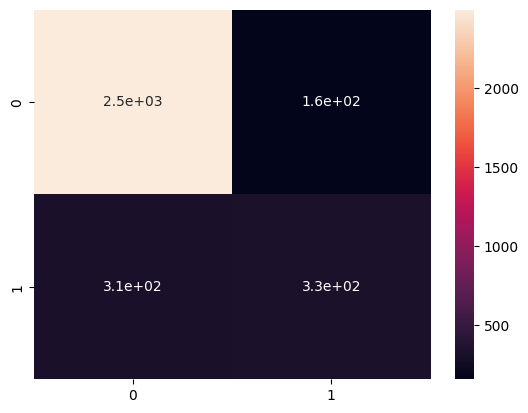

In [168]:
sns.heatmap(cf ,annot=True) #When annot is set to True, the values of each cell in the heatmap will be annotated